In [1]:
# Importing pandas library
import pandas as pd

# Use the upload() function to upload files
from google.colab import files
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    # Load the CSV file into a DataFrame with specified encoding
    df = pd.read_csv(file_name, encoding='latin-1')
    # Display the first few rows of the DataFrame
    print(df.head())


Saving sales_data_sample.csv to sales_data_sample.csv
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER    SALES  \
0        10107               30      95.70                2  2871.00   
1        10121               34      81.35                5  2765.90   
2        10134               41      94.74                2  3884.34   
3        10145               45      83.26                6  3746.70   
4        10159               49     100.00               14  5205.27   

         ORDERDATE   STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...  \
0   2/24/2003 0:00  Shipped       1         2     2003  ...   
1    5/7/2003 0:00  Shipped       2         5     2003  ...   
2    7/1/2003 0:00  Shipped       3         7     2003  ...   
3   8/25/2003 0:00  Shipped       3         8     2003  ...   
4  10/10/2003 0:00  Shipped       4        10     2003  ...   

                    ADDRESSLINE1  ADDRESSLINE2           CITY STATE  \
0        897 Long Airport Avenue           NaN            NYC  

In [4]:

print(df.columns)


Index(['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
       'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
       'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
       'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
       'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
       'DEALSIZE'],
      dtype='object')


In [8]:

import numpy as np
from scipy import stats
df.dropna(inplace=True)

# Removing outliers using z-score method
z_scores = np.abs(stats.zscore(df.select_dtypes(include=np.number)))
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Display information about the dataset after removing outliers
print("Dataset info after removing outliers:")
print(df_no_outliers.info())

# Save the dataset after cleaning
df_no_outliers.to_csv("cleaned_sales_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Dataset info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 10 to 2791
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       144 non-null    int64  
 1   QUANTITYORDERED   144 non-null    int64  
 2   PRICEEACH         144 non-null    float64
 3   ORDERLINENUMBER   144 non-null    int64  
 4   SALES             144 non-null    float64
 5   ORDERDATE         144 non-null    object 
 6   STATUS            144 non-null    object 
 7   QTR_ID            144 non-null    int64  
 8   MONTH_ID          144 non-null    int64  
 9   YEAR_ID           144 non-null    int64  
 10  PRODUCTLINE       144 non-null    object 
 11  MSRP              144 non-null    int64  
 12  PRODUCTCODE       144 non-null    object 
 13  CUSTOMERNAME      144 non-null    object 
 14  PHONE             144 non-null    object 
 15  ADDRESSLINE1      144 non-null    object 
 16  ADDRESSLI

In [9]:
# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_sales_data.csv")

# Convert ORDERDATE to datetime format
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])

# Convert columns to appropriate data types
df_cleaned['ORDERNUMBER'] = df_cleaned['ORDERNUMBER'].astype(int)
df_cleaned['QUANTITYORDERED'] = df_cleaned['QUANTITYORDERED'].astype(int)
df_cleaned['ORDERLINENUMBER'] = df_cleaned['ORDERLINENUMBER'].astype(int)
df_cleaned['SALES'] = df_cleaned['SALES'].astype(float)
df_cleaned['QTR_ID'] = df_cleaned['QTR_ID'].astype(int)
df_cleaned['MONTH_ID'] = df_cleaned['MONTH_ID'].astype(int)
df_cleaned['YEAR_ID'] = df_cleaned['YEAR_ID'].astype(int)
df_cleaned['MSRP'] = df_cleaned['MSRP'].astype(float)

# Standardize categorical values
df_cleaned['STATUS'] = df_cleaned['STATUS'].str.upper()
df_cleaned['PRODUCTLINE'] = df_cleaned['PRODUCTLINE'].str.capitalize()
df_cleaned['PRODUCTCODE'] = df_cleaned['PRODUCTCODE'].str.upper()
df_cleaned['COUNTRY'] = df_cleaned['COUNTRY'].str.capitalize()
df_cleaned['TERRITORY'] = df_cleaned['TERRITORY'].str.upper()
df_cleaned['DEALSIZE'] = df_cleaned['DEALSIZE'].str.upper()

# Handle missing values if any
df_cleaned.dropna(inplace=True)

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Display the formatted dataset information
print("Formatted dataset info:")
print(df_cleaned.info())

# Save the formatted dataset to a new CSV file
df_cleaned.to_csv("formatted_sales_data.csv", index=False)
print("Formatted dataset saved successfully.")

Formatted dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       144 non-null    int64         
 1   QUANTITYORDERED   144 non-null    int64         
 2   PRICEEACH         144 non-null    float64       
 3   ORDERLINENUMBER   144 non-null    int64         
 4   SALES             144 non-null    float64       
 5   ORDERDATE         144 non-null    datetime64[ns]
 6   STATUS            144 non-null    object        
 7   QTR_ID            144 non-null    int64         
 8   MONTH_ID          144 non-null    int64         
 9   YEAR_ID           144 non-null    int64         
 10  PRODUCTLINE       144 non-null    object        
 11  MSRP              144 non-null    float64       
 12  PRODUCTCODE       144 non-null    object        
 13  CUSTOMERNAME      144 non-null    object        
 14  PH

In [10]:

from sklearn.preprocessing import StandardScaler, LabelEncoder
# Standardize numerical variables using StandardScaler
numerical_cols = ['ORDERNUMBER', 'QUANTITYORDERED', 'ORDERLINENUMBER', 'SALES', 'QTR_ID', 'MONTH_ID', 'YEAR_ID', 'MSRP']
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

# Encode categorical variables using LabelEncoder
categorical_cols = ['STATUS', 'PRODUCTLINE', 'PRODUCTCODE', 'COUNTRY', 'TERRITORY', 'DEALSIZE']
label_encoders = {}
for col in categorical_cols:
    label_encoders[col] = LabelEncoder()
    df_cleaned[col] = label_encoders[col].fit_transform(df_cleaned[col])

# Handle outliers using winsorization or another method
# For example, you can winsorize the 'SALES' column
from scipy.stats import mstats
df_cleaned['SALES'] = mstats.winsorize(df_cleaned['SALES'], limits=[0.05, 0.05])

# For example, you can create a new feature 'ORDER_VALUE' by multiplying 'QUANTITYORDERED' and 'PRICEEACH'
df_cleaned['ORDER_VALUE'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

# Display the formatted dataset information
print("Formatted dataset info:")
print(df_cleaned.info())

# Save the formatted dataset to a new CSV file
df_cleaned.to_csv("formatted_sales_data.csv", index=False)
print("Formatted dataset saved successfully.")

Formatted dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       144 non-null    float64       
 1   QUANTITYORDERED   144 non-null    float64       
 2   PRICEEACH         144 non-null    float64       
 3   ORDERLINENUMBER   144 non-null    float64       
 4   SALES             144 non-null    float64       
 5   ORDERDATE         144 non-null    datetime64[ns]
 6   STATUS            144 non-null    int64         
 7   QTR_ID            144 non-null    float64       
 8   MONTH_ID          144 non-null    float64       
 9   YEAR_ID           144 non-null    float64       
 10  PRODUCTLINE       144 non-null    int64         
 11  MSRP              144 non-null    float64       
 12  PRODUCTCODE       144 non-null    int64         
 13  CUSTOMERNAME      144 non-null    object        
 14  PH

In [11]:

import pandas as pd
import numpy as np

# Assuming your DataFrame is named 'df'

# Step 1: Handle non-numeric values
non_numeric_cols = ['STATUS']  # Identify columns with non-numeric values
for col in non_numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # Convert non-numeric values to NaNs

# Step 2: Convert columns to numeric
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()  # Select numeric columns
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')  # Convert to numeric

# Step 3: Calculate summary statistics
summary_stats = df.describe(include='all')

# Display summary statistics
print(summary_stats)

         ORDERNUMBER  QUANTITYORDERED   PRICEEACH  ORDERLINENUMBER  \
count     147.000000       147.000000  147.000000       147.000000   
unique           NaN              NaN         NaN              NaN   
top              NaN              NaN         NaN              NaN   
freq             NaN              NaN         NaN              NaN   
mean    10268.204082        33.986395   84.138639         6.673469   
std       106.742036         9.740458   19.897255         3.830596   
min     10120.000000        15.000000   26.880000         1.000000   
25%     10148.000000        26.000000   66.390000         3.000000   
50%     10270.000000        33.000000   98.050000         6.000000   
75%     10361.000000        41.000000  100.000000        10.000000   
max     10420.000000        66.000000  100.000000        15.000000   

              SALES       ORDERDATE  STATUS      QTR_ID    MONTH_ID  \
count    147.000000             147     0.0  147.000000  147.000000   
unique          N

   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0    -0.429384         0.368447     100.00        -1.499935  0.400403   
1     0.873123        -1.461083      72.55         1.637944 -1.216600   
2     0.014223        -1.353463     100.00         0.591984  1.004678   
3     0.740985        -0.384889     100.00        -1.499935  0.386925   
4     1.156277        -1.030605     100.00        -0.715465 -0.595716   

    ORDERDATE  STATUS    QTR_ID  MONTH_ID   YEAR_ID  ...  ADDRESSLINE2  \
0  2004-02-20       1 -1.450327 -1.357378  0.187251  ...       Level 3   
1  2004-12-17       1  1.117465  1.327545  0.187251  ...       Level 6   
2  2004-07-19       1  0.261534 -0.014916  0.187251  ...       Level 6   
3  2004-11-29       1  1.117465  1.059053  0.187251  ...       Level 3   
4  2005-03-09       1 -1.450327 -1.088885  1.535462  ...      Level 15   

           CITY     STATE POSTALCODE COUNTRY TERRITORY CONTACTLASTNAME  \
0     Melbourne  Victoria       3004      

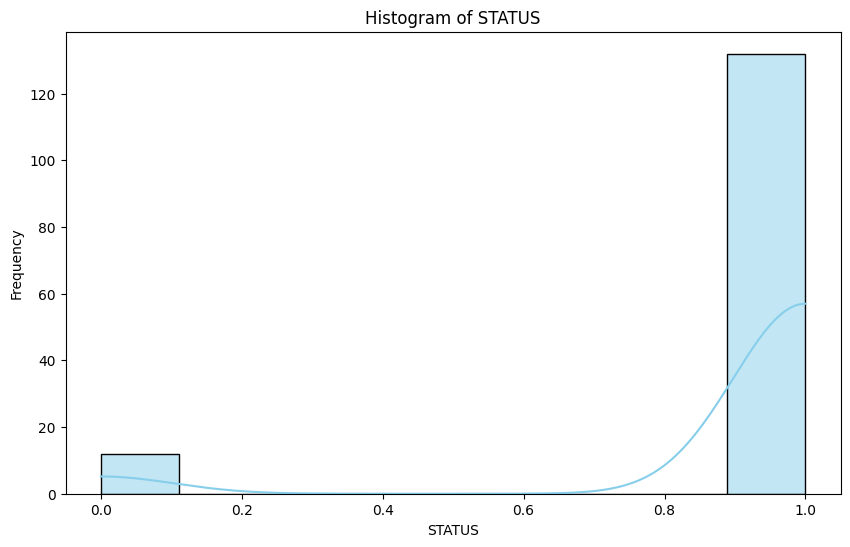

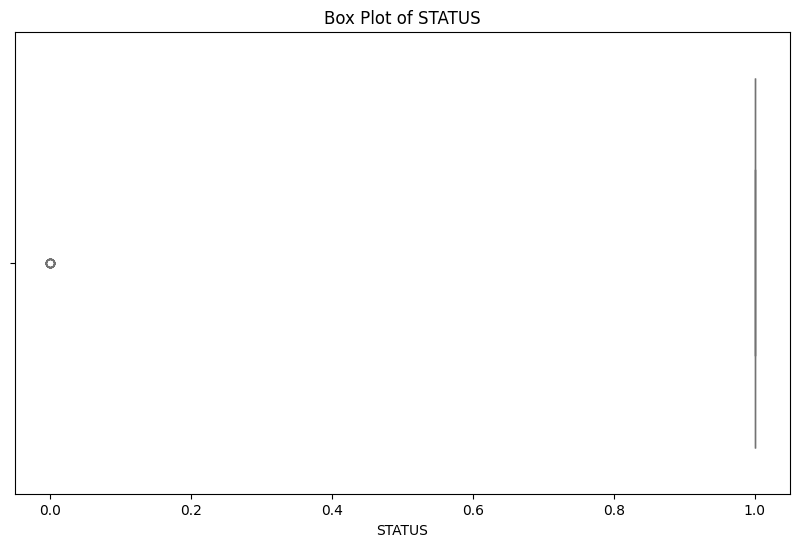

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load the formatted data from CSV
df = pd.read_csv('formatted_sales_data.csv')

# Display the first few rows of the DataFrame
print(df.head())

# Visualize data distributions using histograms, box plots, and density plots

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['STATUS'], kde=True, color='skyblue')
plt.title('Histogram of STATUS')
plt.xlabel('STATUS')
plt.ylabel('Frequency')
plt.show()

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', data=df, color='lightgreen')
plt.title('Box Plot of STATUS')
plt.xlabel('STATUS')
plt.show()



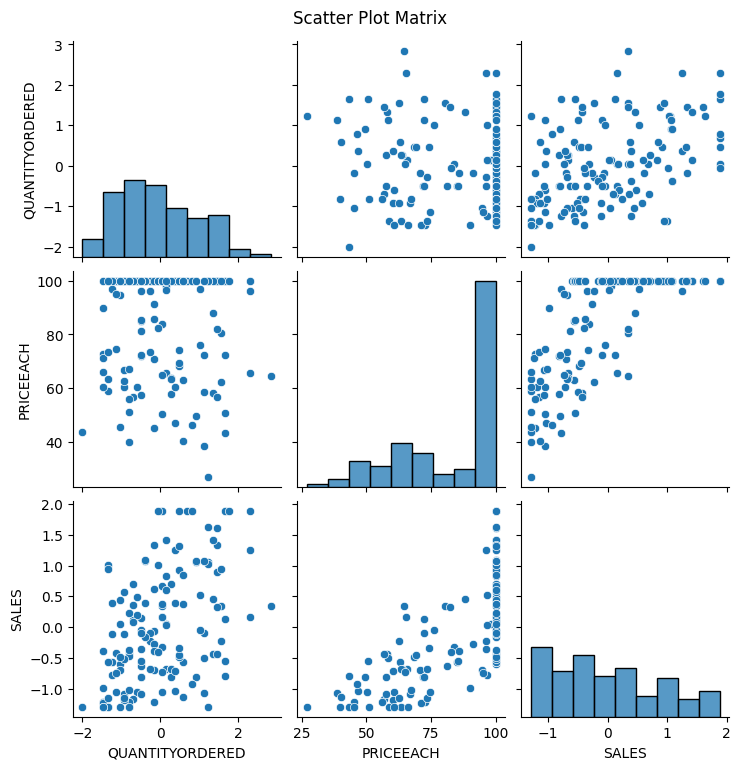

<ipython-input-13-716714fe8dba>:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SALES'], shade=True, color='orange')


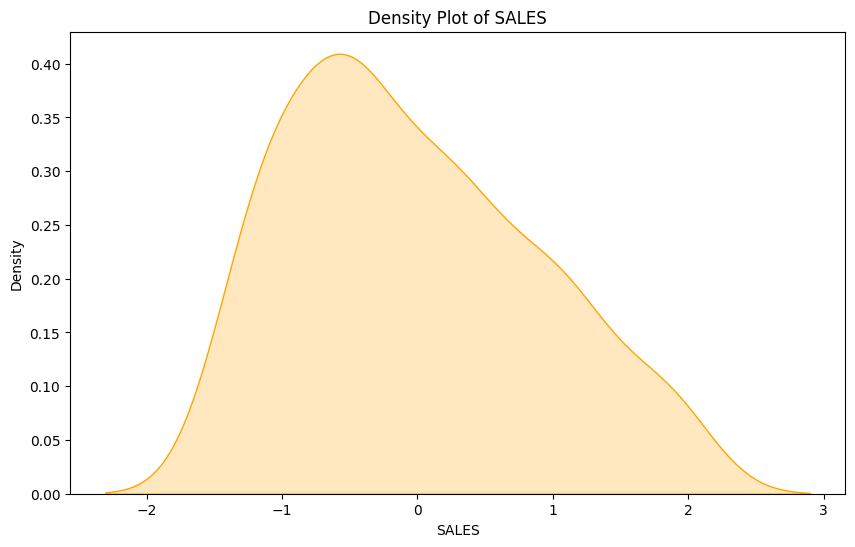

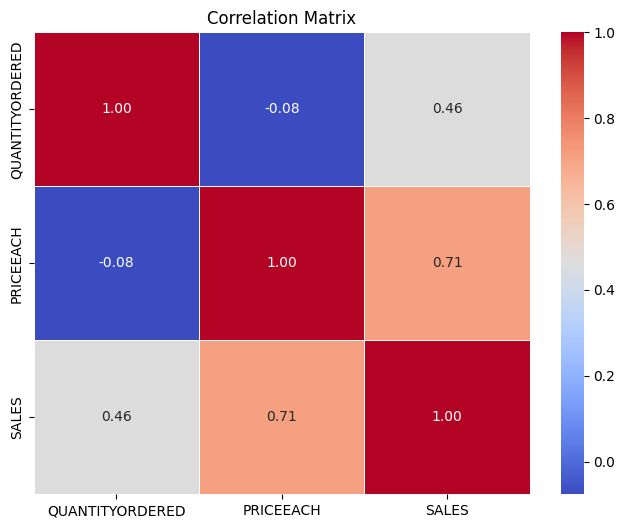

In [13]:
# Load the formatted data from CSV
df = pd.read_csv('formatted_sales_data.csv')

# Scatter plot matrix
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']])
plt.suptitle('Scatter Plot Matrix', y=1.02)
plt.show()

# Density plot
plt.figure(figsize=(10, 6))
sns.kdeplot(df['SALES'], shade=True, color='orange')
plt.title('Density Plot of SALES')
plt.xlabel('SALES')
plt.ylabel('Density')
plt.show()

# Correlation matrix
correlation_matrix = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

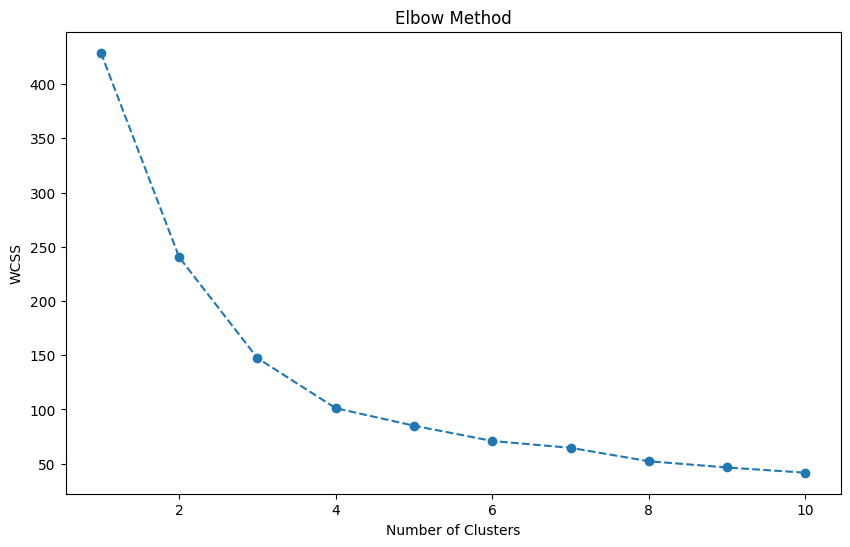

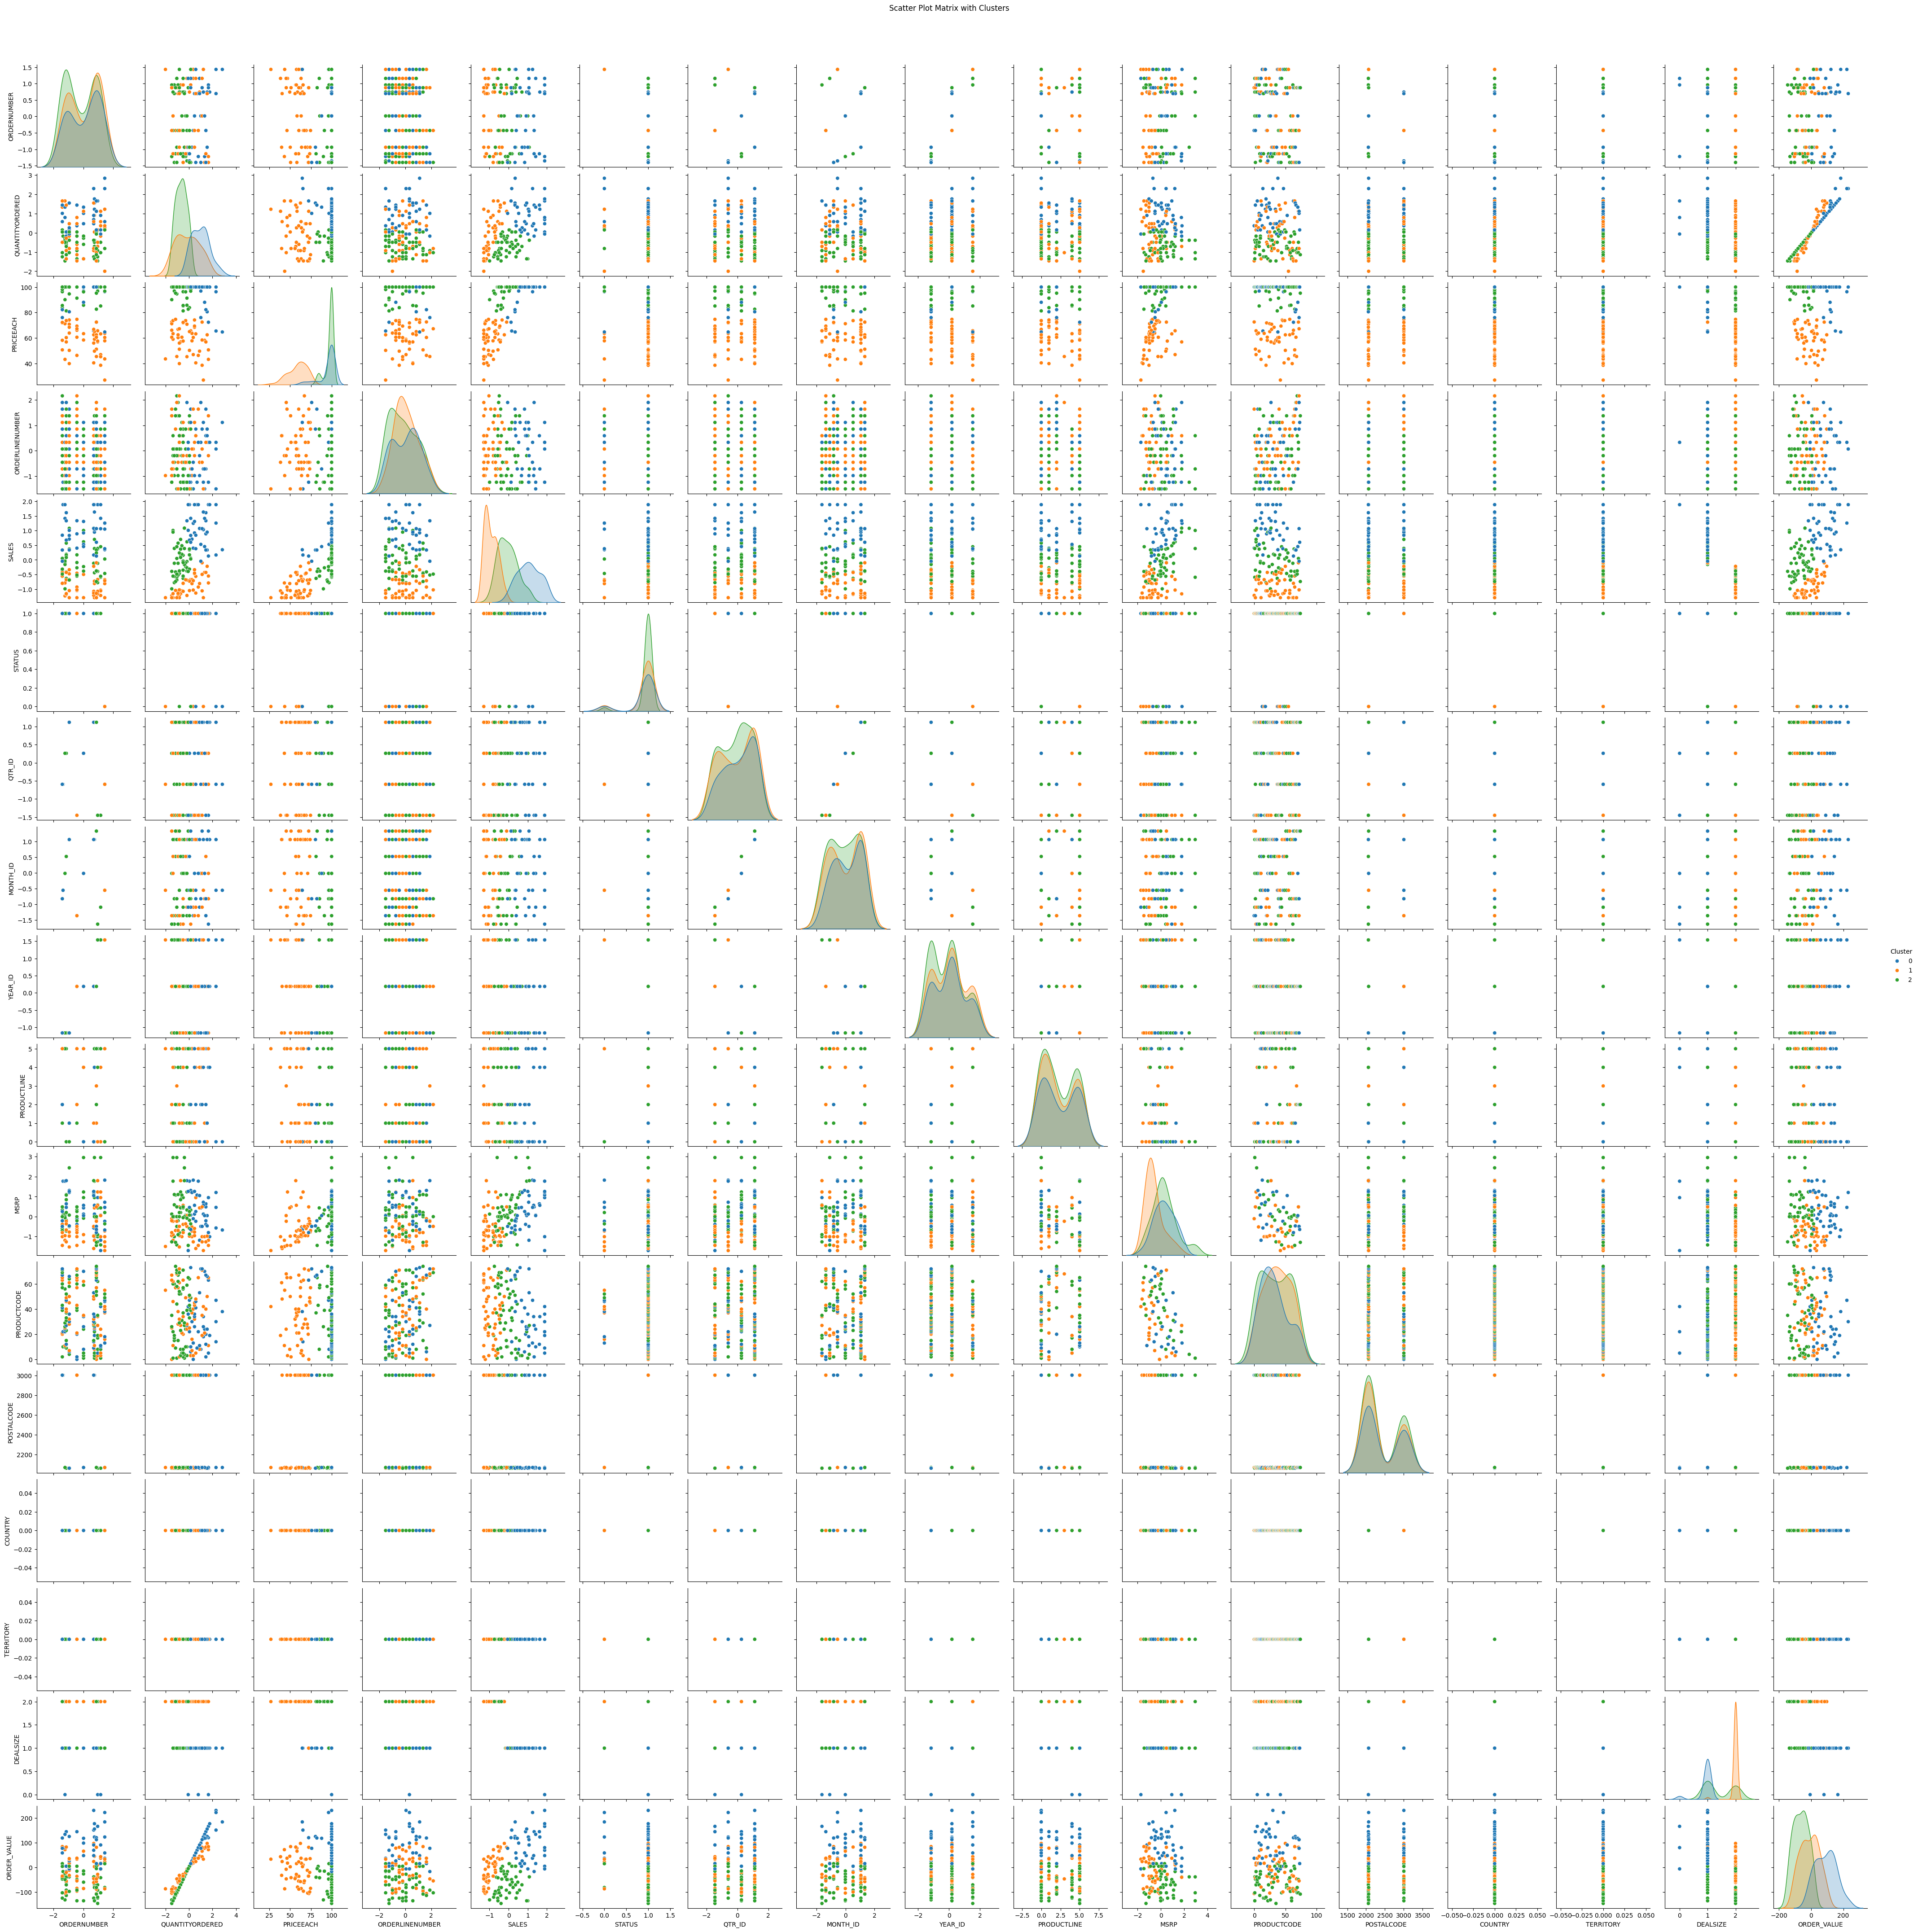

<ipython-input-14-65121e907df7>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='SALES', data=df, palette='tab10')


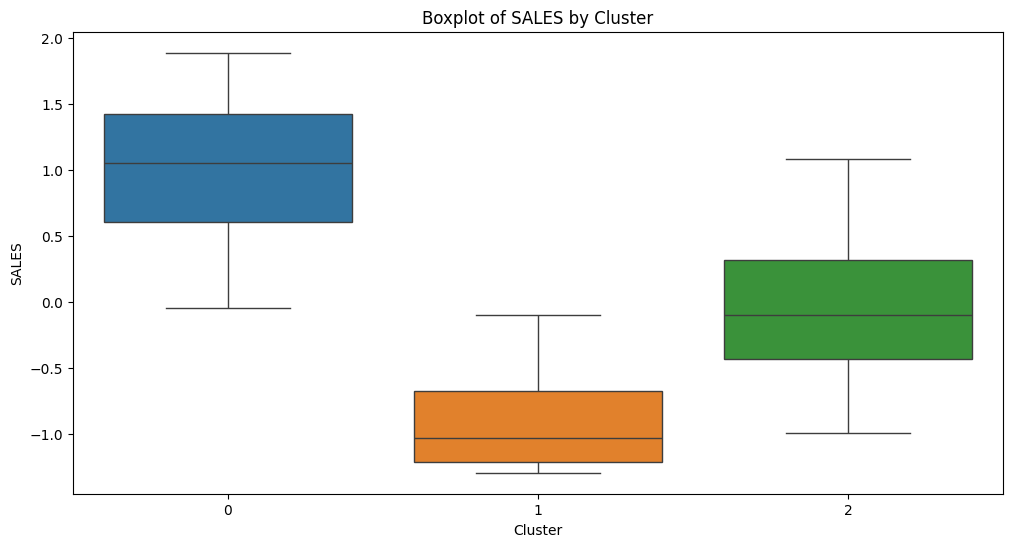

<ipython-input-14-65121e907df7>:52: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y='SALES', data=df, palette='tab10')


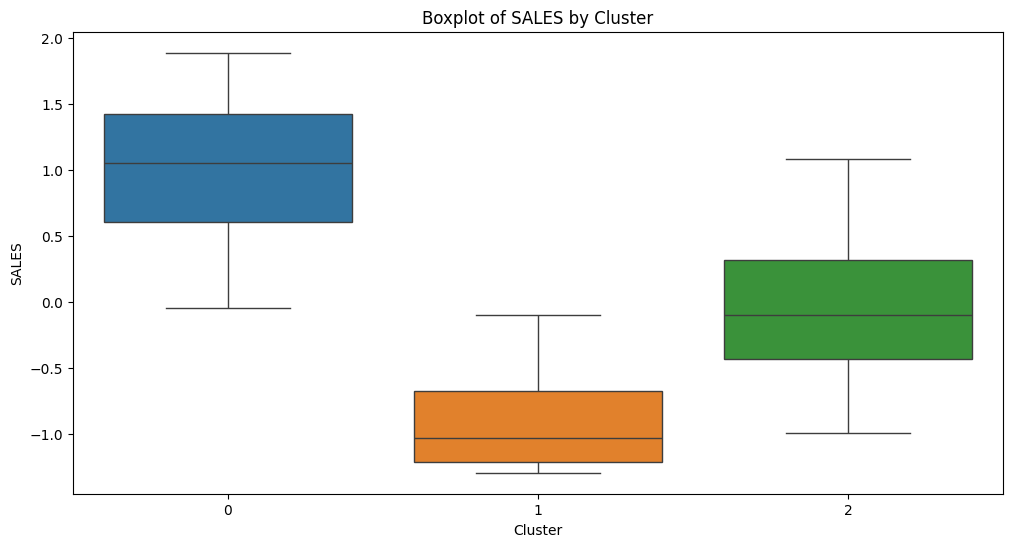


Customer Profiles:
   Cluster  Avg_QUANTITYORDERED  Std_QUANTITYORDERED  Min_QUANTITYORDERED  \
0        0             0.985290             0.742115            -0.169650   
1        1            -0.105957             0.991452            -1.999179   
2        2            -0.651944             0.465473            -1.461083   

   Max_QUANTITYORDERED  Count  Avg_PRICEEACH  Std_PRICEEACH  Min_PRICEEACH  \
0             2.843693     41      95.667073       9.844107          64.67   
1             1.659879     49      59.056735      11.286480          26.88   
2             0.153208     54      97.394444       5.259687          81.25   

   Max_PRICEEACH  Avg_SALES  Std_SALES  Min_SALES  Max_SALES  
0         100.00   1.058408   0.576450  -0.048214   1.886319  
1          74.62  -0.910581   0.332384  -1.294471  -0.100633  
2         100.00  -0.044070   0.503099  -0.991411   1.084485  


In [14]:

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the formatted data from CSV
df = pd.read_csv('formatted_sales_data.csv')

# Select features for segmentation
features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES']

# Normalize the features
df_normalized = (df[features] - df[features].mean()) / df[features].std()

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_normalized)

# Visualize the clusters using pairplot
sns.pairplot(df, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix with Clusters', y=1.02)
plt.show()


# Visualize the clusters using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='SALES', data=df, palette='tab10')
plt.title('Boxplot of SALES by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SALES')
plt.show()

# Visualize the clusters using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x='Cluster', y='SALES', data=df, palette='tab10')
plt.title('Boxplot of SALES by Cluster')
plt.xlabel('Cluster')
plt.ylabel('SALES')
plt.show()
# Create customer profiles
customer_profiles = df.groupby('Cluster').agg({
    'QUANTITYORDERED': ['mean', 'std', 'min', 'max', 'count'],
    'PRICEEACH': ['mean', 'std', 'min', 'max'],
    'SALES': ['mean', 'std', 'min', 'max']
}).reset_index()

# Rename columns for better interpretation
customer_profiles.columns = ['Cluster',
                             'Avg_QUANTITYORDERED', 'Std_QUANTITYORDERED', 'Min_QUANTITYORDERED', 'Max_QUANTITYORDERED', 'Count',
                             'Avg_PRICEEACH', 'Std_PRICEEACH', 'Min_PRICEEACH', 'Max_PRICEEACH',
                             'Avg_SALES', 'Std_SALES', 'Min_SALES', 'Max_SALES']

# Display customer profiles
print("\nCustomer Profiles:")
print(customer_profiles)


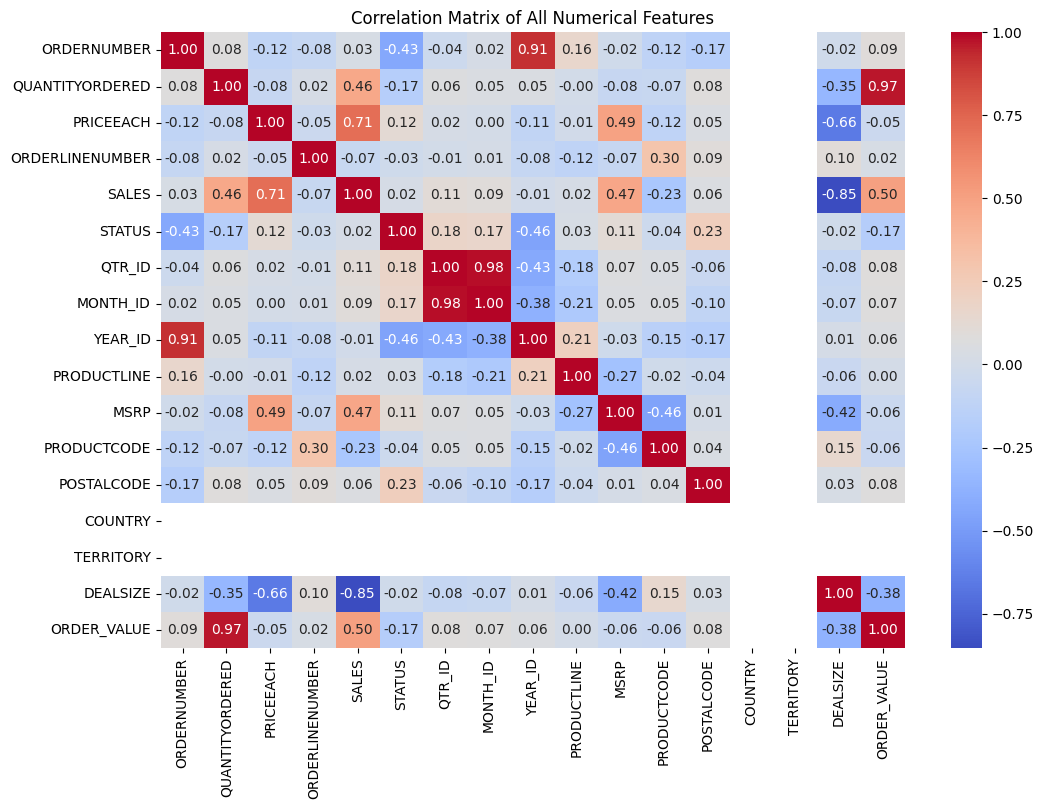

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns for correlation calculation
numeric_cols = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of All Numerical Features')
plt.show()



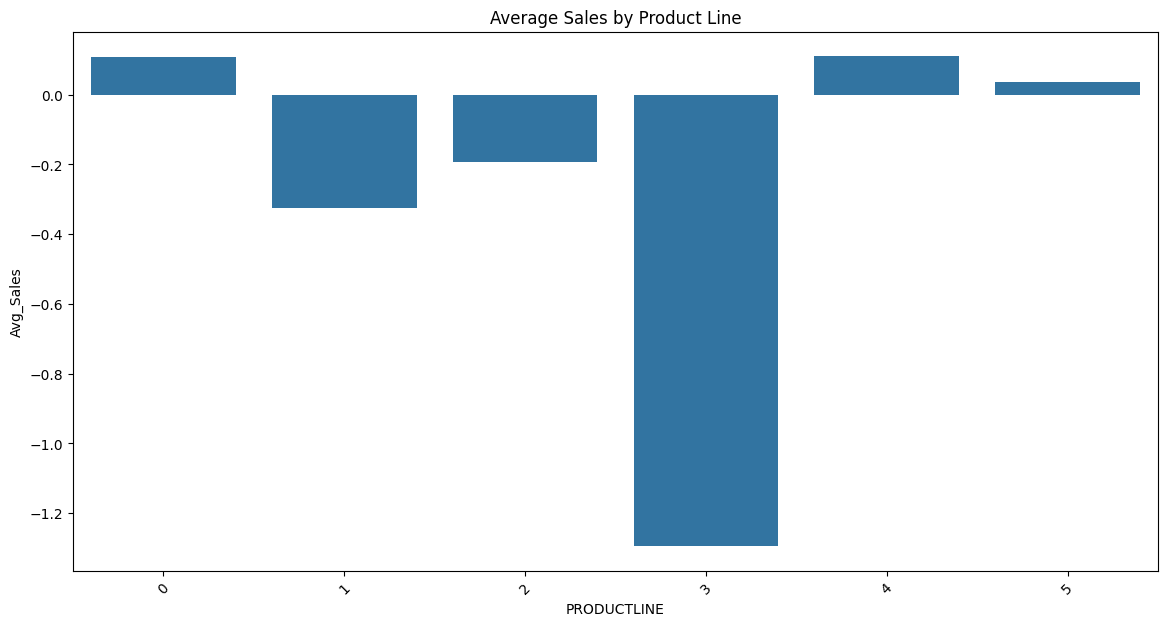

In [17]:
# Group data by 'PRODUCTLINE' and aggregate by average sales and count of orders
product_line_performance = df_cleaned.groupby('PRODUCTLINE').agg({'SALES': ['mean', 'sum'], 'ORDERNUMBER': 'count'}).reset_index()
product_line_performance.columns = ['PRODUCTLINE', 'Avg_Sales', 'Total_Sales', 'Order_Count']

# Visualizing the aggregated data
plt.figure(figsize=(14, 7))
sns.barplot(data=product_line_performance, x='PRODUCTLINE', y='Avg_Sales')
plt.title('Average Sales by Product Line')
plt.xticks(rotation=45)
plt.show()


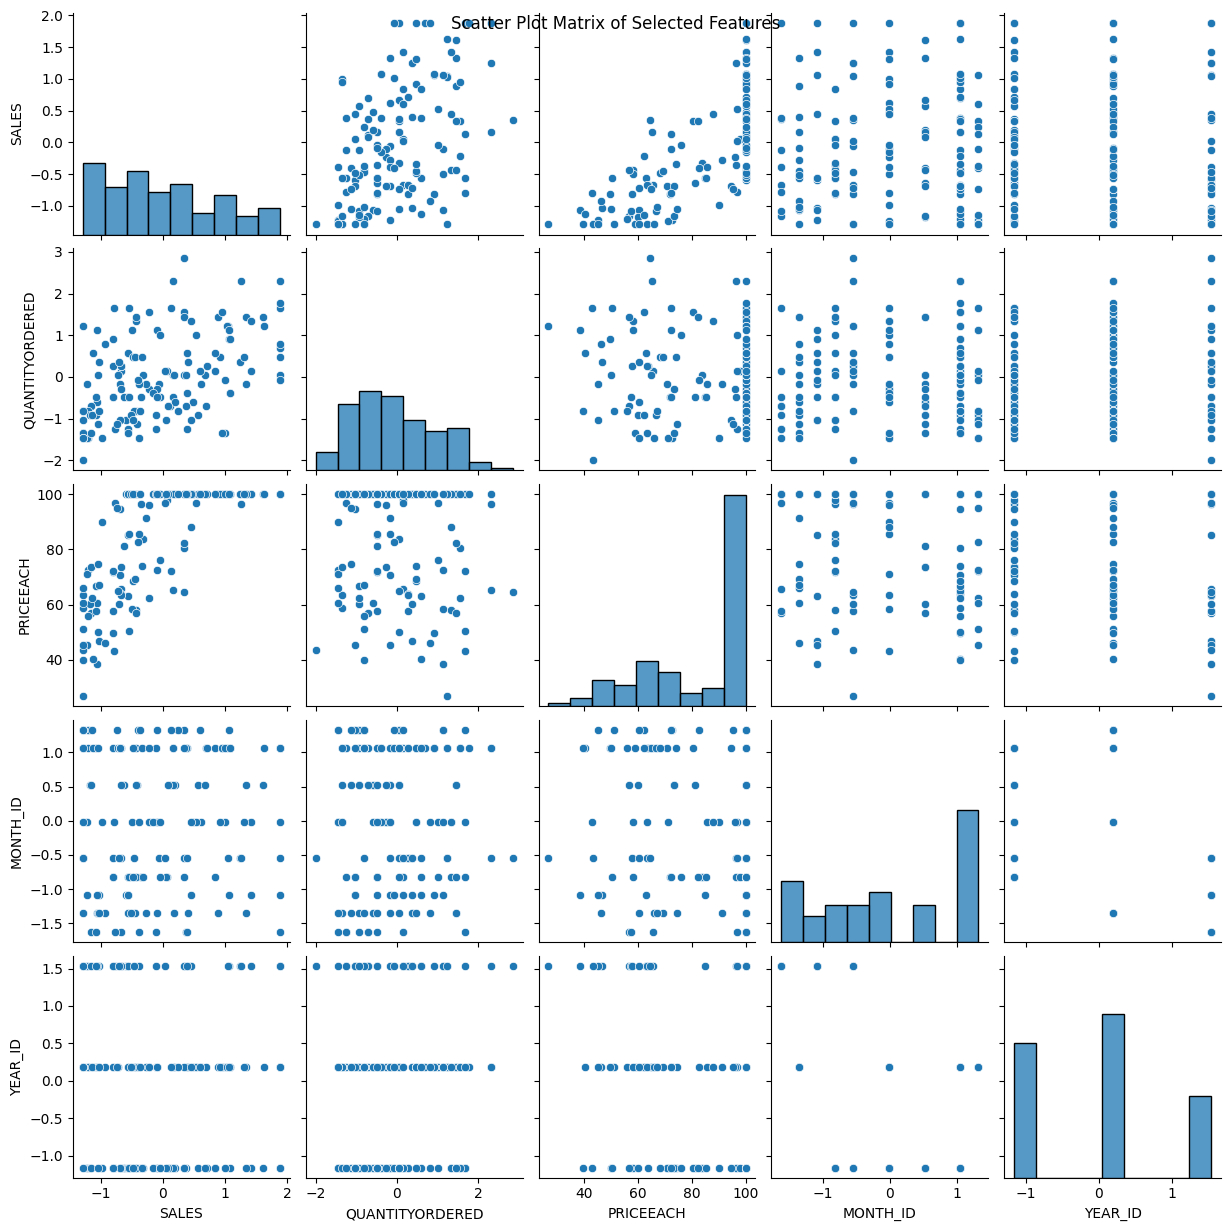

In [18]:
# Selecting a subset of variables to plot
sns.pairplot(df_cleaned[['SALES', 'QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']])
plt.suptitle('Scatter Plot Matrix of Selected Features')
plt.show()


In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Define the feature set and target variable
X = df_cleaned[['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID', 'MSRP']]
y = df_cleaned['SALES']

# Fit a linear regression model
model = LinearRegression()
model.fit(X, y)

# Display the coefficients
feature_importance = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(feature_importance.sort_values(by='Coefficient', ascending=False))
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Performing ANOVA
model = ols('SALES ~ C(PRODUCTLINE)', data=df_cleaned).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 Coefficient
QUANTITYORDERED     0.472728
MSRP                0.160500
MONTH_ID            0.080170
YEAR_ID             0.069198
PRICEEACH           0.030694
                    sum_sq     df         F    PR(>F)
C(PRODUCTLINE)    5.283985    5.0  1.287204  0.272901
Residual        113.298305  138.0       NaN       NaN


In [21]:
import pandas as pd
import numpy as np

# Load your cleaned data
df_cleaned = pd.read_csv('formatted_sales_data.csv')

# 1. Creating Interaction Features
# Creating a new feature that multiplies QUANTITYORDERED with PRICEEACH
df_cleaned['quantity_x_price'] = df_cleaned['QUANTITYORDERED'] * df_cleaned['PRICEEACH']

# 2. Binning/Categorizing Continuous Variables
# Bin the 'SALES' into categories
df_cleaned['sales_category'] = pd.cut(df_cleaned['SALES'], bins=[0, 5000, 10000, 50000, 100000], labels=['Low', 'Medium', 'High', 'Very High'])

# 3. Polynomial Features
# Adding squared terms for 'QUANTITYORDERED' and 'PRICEEACH'
df_cleaned['quantity_squared'] = df_cleaned['QUANTITYORDERED'] ** 2
df_cleaned['price_squared'] = df_cleaned['PRICEEACH'] ** 2

# 4. Aggregating Features
# Group by 'PRODUCTLINE' and calculate average sales, add it as a new column
avg_sales_per_productline = df_cleaned.groupby('PRODUCTLINE')['SALES'].transform('mean')
df_cleaned['avg_sales_per_productline'] = avg_sales_per_productline

# 5. Time-Based Features
# Convert 'ORDERDATE' to datetime
df_cleaned['ORDERDATE'] = pd.to_datetime(df_cleaned['ORDERDATE'])
df_cleaned['year'] = df_cleaned['ORDERDATE'].dt.year
df_cleaned['month'] = df_cleaned['ORDERDATE'].dt.month
df_cleaned['day_of_week'] = df_cleaned['ORDERDATE'].dt.dayofweek

# Saving the transformed dataset
df_cleaned.to_csv('enhanced_sales_data.csv', index=False)

# Show the head of the new DataFrame
print(df_cleaned.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0    -0.429384         0.368447     100.00        -1.499935  0.400403   
1     0.873123        -1.461083      72.55         1.637944 -1.216600   
2     0.014223        -1.353463     100.00         0.591984  1.004678   
3     0.740985        -0.384889     100.00        -1.499935  0.386925   
4     1.156277        -1.030605     100.00        -0.715465 -0.595716   

   ORDERDATE  STATUS    QTR_ID  MONTH_ID   YEAR_ID  ...  DEALSIZE  \
0 2004-02-20       1 -1.450327 -1.357378  0.187251  ...         1   
1 2004-12-17       1  1.117465  1.327545  0.187251  ...         2   
2 2004-07-19       1  0.261534 -0.014916  0.187251  ...         1   
3 2004-11-29       1  1.117465  1.059053  0.187251  ...         1   
4 2005-03-09       1 -1.450327 -1.088885  1.535462  ...         2   

   ORDER_VALUE  quantity_x_price sales_category quantity_squared  \
0    36.844691         36.844691            Low         0.135753   
1  -106.00

In [22]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assuming your DataFrame 'df_cleaned' is already loaded and contains the necessary columns

# Feature Scaling
scaler = StandardScaler()

# It's a good practice to only scale continuous features
continuous_features = ['QUANTITYORDERED', 'PRICEEACH', 'SALES', 'quantity_x_price', 'quantity_squared', 'price_squared', 'avg_sales_per_productline']
df_cleaned[continuous_features] = scaler.fit_transform(df_cleaned[continuous_features])

# Label Encoding for Categorical Variables
# For instance, let's encode 'PRODUCTLINE' and 'sales_category'
label_encoder = LabelEncoder()
df_cleaned['PRODUCTLINE_encoded'] = label_encoder.fit_transform(df_cleaned['PRODUCTLINE'])
df_cleaned['sales_category_encoded'] = label_encoder.fit_transform(df_cleaned['sales_category'])

# Log Transformation
# Apply log transformation to 'SALES' to reduce skewness (adding 1 to avoid log(0))
df_cleaned['log_sales'] = np.log1p(df_cleaned['SALES'])

# You can also consider encoding dates as cyclical features
# Transform 'month' and 'day_of_week' into sine and cosine components for cyclical nature
df_cleaned['month_sin'] = np.sin((df_cleaned['month'] - 1) * (2. * np.pi / 12))
df_cleaned['month_cos'] = np.cos((df_cleaned['month'] - 1) * (2. * np.pi / 12))
df_cleaned['day_of_week_sin'] = np.sin(df_cleaned['day_of_week'] * (2. * np.pi / 7))
df_cleaned['day_of_week_cos'] = np.cos(df_cleaned['day_of_week'] * (2. * np.pi / 7))

# Saving the transformed dataset with additional features
df_cleaned.to_csv('enhanced_sales_data_with_additional_features.csv', index=False)

# Show the head of the new DataFrame to verify changes
print(df_cleaned.head())


   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER     SALES  \
0    -0.429384         0.368447   0.809894        -1.499935  0.468810   
1     0.873123        -1.461083  -0.567285         1.637944 -1.313086   
2     0.014223        -1.353463   0.809894         0.591984  1.134705   
3     0.740985        -0.384889   0.809894        -1.499935  0.453958   
4     1.156277        -1.030605   0.809894        -0.715465 -0.628887   

   ORDERDATE  STATUS    QTR_ID  MONTH_ID   YEAR_ID  ...  year  month  \
0 2004-02-20       1 -1.450327 -1.357378  0.187251  ...  2004      2   
1 2004-12-17       1  1.117465  1.327545  0.187251  ...  2004     12   
2 2004-07-19       1  0.261534 -0.014916  0.187251  ...  2004      7   
3 2004-11-29       1  1.117465  1.059053  0.187251  ...  2004     11   
4 2005-03-09       1 -1.450327 -1.088885  1.535462  ...  2005      3   

   day_of_week PRODUCTLINE_encoded sales_category_encoded log_sales  \
0            4                   1                      0

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [23]:
import numpy as np

# Check minimum value in 'SALES'
print("Minimum value in SALES:", df_cleaned['SALES'].min())

# If there are non-positive values, adjust by adding a constant
# We choose 1 because log(1) = 0 and we use log1p which does log(1+x)
if df_cleaned['SALES'].min() <= 0:
    adjustment = 1 - df_cleaned['SALES'].min()  # This will shift all values to at least 1
    df_cleaned['adjusted_sales'] = df_cleaned['SALES'] + adjustment
else:
    df_cleaned['adjusted_sales'] = df_cleaned['SALES']

# Apply log transformation
df_cleaned['log_sales'] = np.log1p(df_cleaned['adjusted_sales'])

# Verify the transformation
print("Check transformed data:")
print(df_cleaned[['SALES', 'adjusted_sales', 'log_sales']].head())


Minimum value in SALES: -1.3988978361857398
Check transformed data:
      SALES  adjusted_sales  log_sales
0  0.468810        2.867708   1.352662
1 -1.313086        1.085812   0.735158
2  1.134705        3.533603   1.511517
3  0.453958        2.852855   1.348815
4 -0.628887        1.770011   1.018851


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Selecting features and target
X = df_cleaned[['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']]  # example features
y = df_cleaned['SALES']  # target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 0.23111439928908795
R^2 Score: 0.7473119420343698


In [25]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Define a threshold for high sales
threshold = df_cleaned['SALES'].quantile(0.75)  # Let's say high sales are above the 75th percentile
df_cleaned['high_sales'] = (df_cleaned['SALES'] > threshold).astype(int)

# Selecting features and the new binary target
X = df_cleaned[['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']]  # example features
y = df_cleaned['high_sales']  # binary target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)


Accuracy: 0.7586206896551724
Confusion Matrix:
 [[18  4]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84        22
           1       0.50      0.57      0.53         7

    accuracy                           0.76        29
   macro avg       0.68      0.69      0.69        29
weighted avg       0.77      0.76      0.76        29



In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X, y)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Train the model with the best parameters
best_rf_classifier = RandomForestClassifier(**best_params, random_state=42)
best_rf_classifier.fit(X, y)


RandomForestClassifier(min_samples_split=10, random_state=42)

In [27]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with the best model
cv_scores = cross_val_score(best_rf_classifier, X, y, cv=5)

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", cv_scores.mean())


Cross-Validation Scores: [0.82758621 0.93103448 0.89655172 0.93103448 0.85714286]
Mean CV Score: 0.8886699507389162


In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectFromModel

# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Feature selection based on importance
selector = SelectFromModel(best_rf_model, threshold='mean')
selector.fit(X_train, y_train)

# Transform the training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7586206896551724
Confusion Matrix:
[[20  2]
 [ 5  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.50      0.29      0.36         7

    accuracy                           0.76        29
   macro avg       0.65      0.60      0.61        29
weighted avg       0.73      0.76      0.73        29



In [34]:
# Check if the number of features used for training matches the number of feature importances
if len(X_train.columns) != len(feature_importance):
    print("Number of features and feature importances do not match!")
else:
    # Create a DataFrame to display feature importance
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

    # Display the top 10 most important features
    print("Top 10 Most Important Features:")
    print(feature_importance_df.sort_values(by='Importance', ascending=False).head(10))





Number of features and feature importances do not match!


In [35]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Assuming X_train and y_train are already defined

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Random Forest classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Get feature importance from the trained model
feature_importance = rf_model.feature_importances_

# Check the number of features and feature importances
print("Number of features:", len(X_train.columns))
print("Length of feature_importance array:", len(feature_importance))

# Print the columns used for training
print("Columns used for training:", X_train.columns.tolist())

# Print the feature importance values
print("Feature importance:", feature_importance)

# Create a DataFrame to display feature importance
try:
    feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
    # Display the top 10 most important features
    print("Top 10 Most Important Features:")
    print(feature_importance_df.sort_values(by='Importance', ascending=False).head(10))
except ValueError:
    print("Number of features and feature importances do not match!")


Number of features: 4
Length of feature_importance array: 4
Columns used for training: ['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']
Feature importance: [0.48987614 0.36254025 0.11469655 0.03288705]
Top 10 Most Important Features:
           Feature  Importance
0  QUANTITYORDERED    0.489876
1        PRICEEACH    0.362540
2         MONTH_ID    0.114697
3          YEAR_ID    0.032887


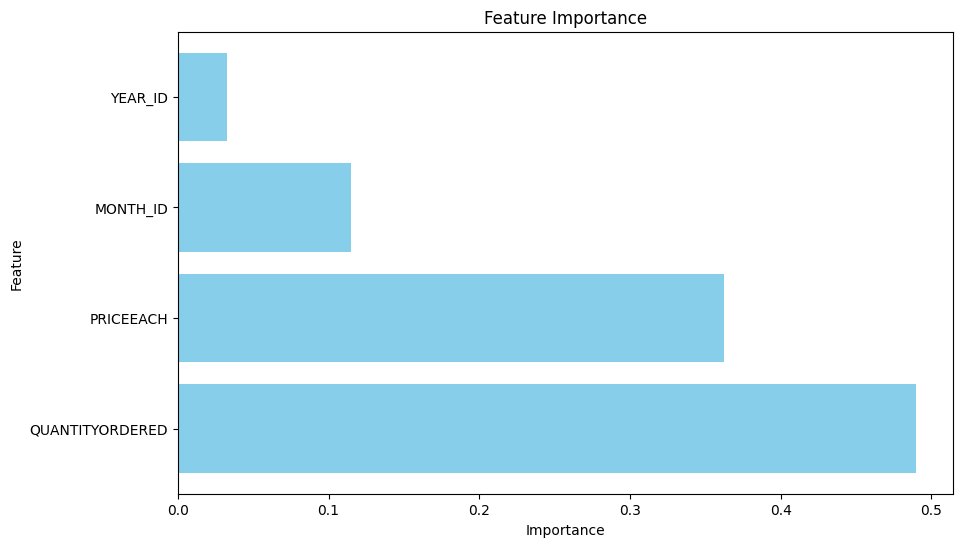

In [36]:
# Plotting feature importance
import matplotlib.pyplot as plt

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = X_train.columns[sorted_idx]
sorted_importance = feature_importance[sorted_idx]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importance, color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()


In [37]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)
from sklearn.feature_selection import RFE

# Create the RFE object
rfe = RFE(estimator=RandomForestClassifier(**best_params), n_features_to_select=5)

# Fit the RFE
rfe.fit(X_train, y_train)

# Get selected features
selected_features = X_train.columns[rfe.support_]
print("Selected Features:", selected_features)
from sklearn.model_selection import cross_val_score

# Initialize the best model with the best hyperparameters
best_model = RandomForestClassifier(**best_params)

# Evaluate the model using cross-validation
cv_scores = cross_val_score(best_model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Selected Features: Index(['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID'], dtype='object')
Cross-Validation Scores: [0.73913043 0.95652174 0.86956522 0.86956522 0.91304348]
Mean CV Score: 0.8695652173913043


In [38]:
# Define the parameter grid for grid search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found by grid search
print("Best Hyperparameters:", grid_search.best_params_)

# Use the best estimator from grid search
best_rf_model = grid_search.best_estimator_

# Feature selection based on importance
selector = SelectFromModel(best_rf_model, threshold='mean')
selector.fit(X_train, y_train)

# Transform the training and testing data
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Train the model on the selected features
best_rf_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test_selected)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Accuracy: 0.7586206896551724
Confusion Matrix:
[[20  2]
 [ 5  2]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.91      0.85        22
           1       0.50      0.29      0.36         7

    accuracy                           0.76        29
   macro avg       0.65      0.60      0.61        29
weighted avg       0.73      0.76      0.73        29



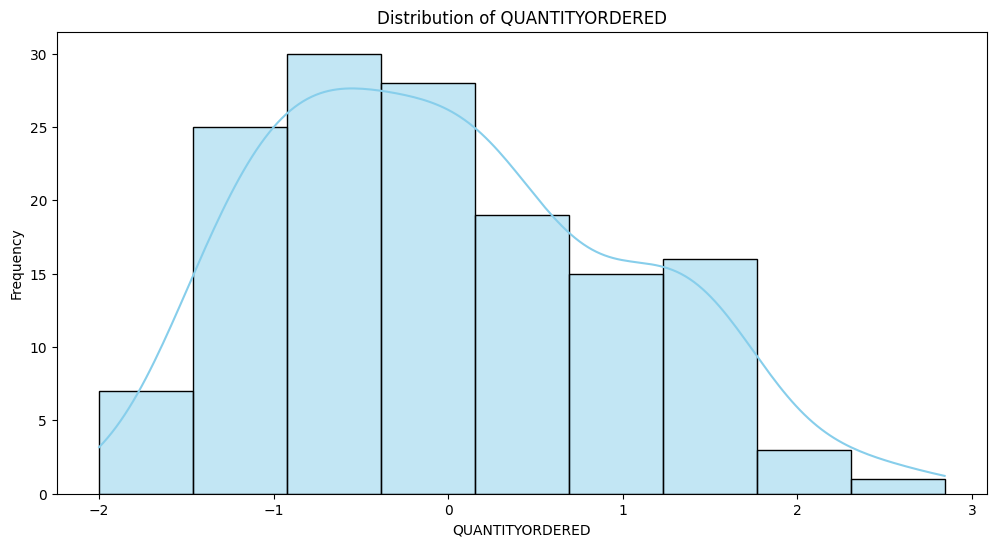

<ipython-input-42-b4b21196b5c5>:14: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['SALES'], shade=True, color='orange')


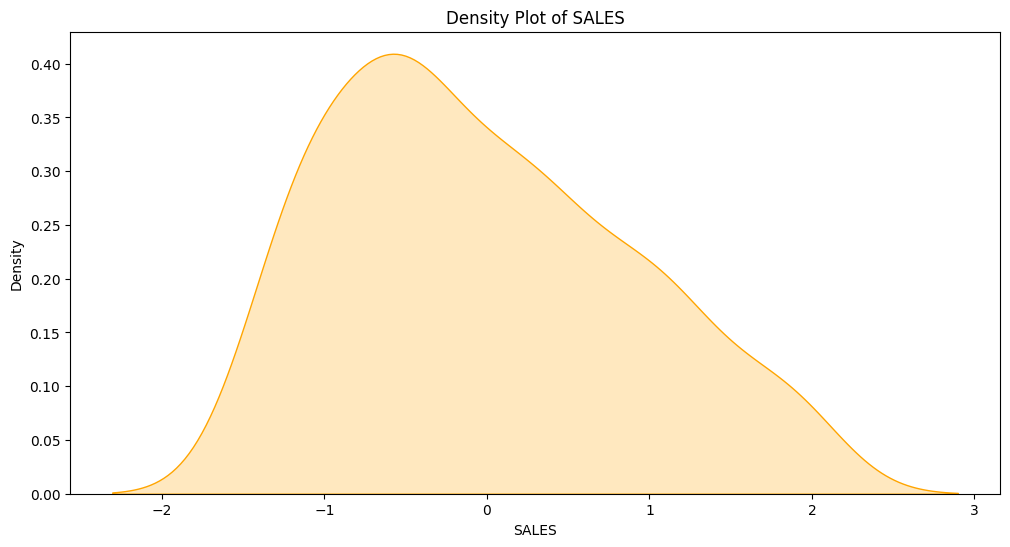

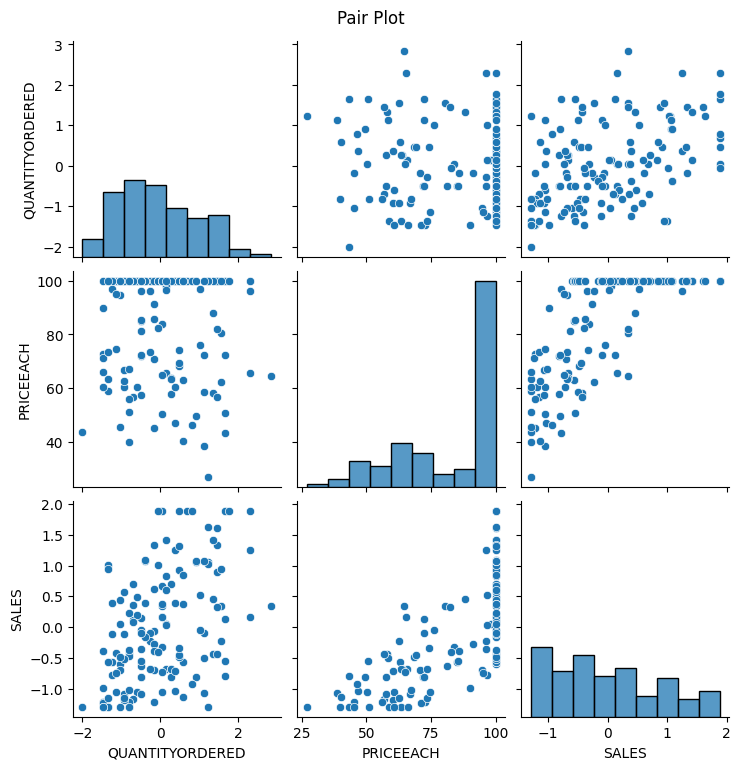

<ipython-input-42-b4b21196b5c5>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='STATUS', y='SALES', data=df, palette='tab10')


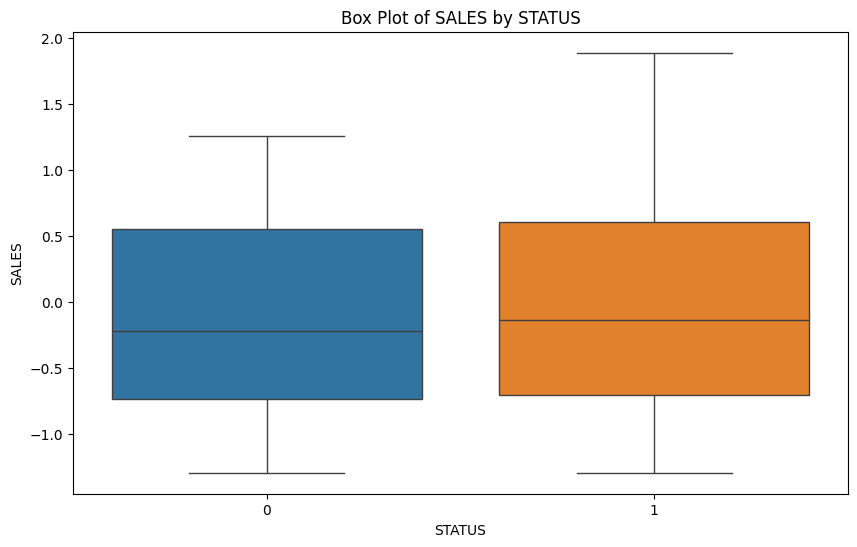

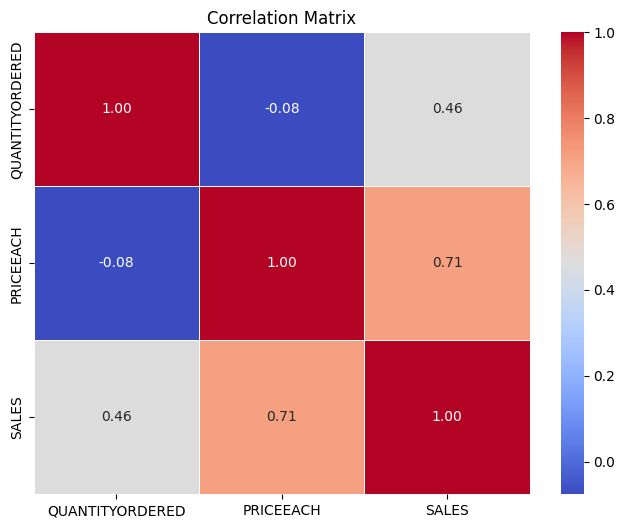

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograms
plt.figure(figsize=(12, 6))
sns.histplot(df['QUANTITYORDERED'], kde=True, color='skyblue')
plt.title('Distribution of QUANTITYORDERED')
plt.xlabel('QUANTITYORDERED')
plt.ylabel('Frequency')
plt.show()

# Distribution plot
plt.figure(figsize=(12, 6))
sns.kdeplot(df['SALES'], shade=True, color='orange')
plt.title('Density Plot of SALES')
plt.xlabel('SALES')
plt.ylabel('Density')
plt.show()
# Pair plot
sns.pairplot(df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']])
plt.suptitle('Pair Plot', y=1.02)
plt.show()
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='STATUS', y='SALES', data=df, palette='tab10')
plt.title('Box Plot of SALES by STATUS')
plt.xlabel('STATUS')
plt.ylabel('SALES')
plt.show()
# Correlation matrix
correlation_matrix = df[['QUANTITYORDERED', 'PRICEEACH', 'SALES']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()



In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy')

# Perform the grid search
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Hyperparameters:", best_params)
print("Best Accuracy:", best_score)


Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy: 0.8695652173913043


In [44]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Get the best model
best_rf_model = grid_search.best_estimator_

# Train the model with the best parameters
best_rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_rf_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Classification report
class_report = classification_report(y_test, y_pred)
print("Classification Report:\n", class_report)


Accuracy: 0.8620689655172413
Confusion Matrix:
 [[21  1]
 [ 3  4]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91        22
           1       0.80      0.57      0.67         7

    accuracy                           0.86        29
   macro avg       0.84      0.76      0.79        29
weighted avg       0.86      0.86      0.85        29



In [54]:
import pandas as pd
import numpy as np

# Define the columns of the new DataFrame based on the original data
columns = ['ORDERNUMBER', 'QUANTITYORDERED', 'PRICEEACH', 'ORDERLINENUMBER',
           'SALES', 'ORDERDATE', 'STATUS', 'QTR_ID', 'MONTH_ID', 'YEAR_ID',
           'PRODUCTLINE', 'MSRP', 'PRODUCTCODE', 'CUSTOMERNAME', 'PHONE',
           'ADDRESSLINE1', 'ADDRESSLINE2', 'CITY', 'STATE', 'POSTALCODE',
           'COUNTRY', 'TERRITORY', 'CONTACTLASTNAME', 'CONTACTFIRSTNAME',
           'DEALSIZE', 'ORDER_VALUE']

# Generate random data for each column
num_rows = 5  # Number of rows in the new DataFrame
random_data = {
    'ORDERNUMBER': np.random.randint(1000, 2000, num_rows),
    'QUANTITYORDERED': np.random.randint(1, 10, num_rows),
    'PRICEEACH': np.random.uniform(10, 100, num_rows),
    'ORDERLINENUMBER': np.random.randint(1, 10, num_rows),
    'SALES': np.random.uniform(100, 1000, num_rows),
    'ORDERDATE': pd.date_range(start='2024-01-01', periods=num_rows),
    'STATUS': np.random.choice(['Shipped', 'Cancelled', 'Resolved'], num_rows),
    'QTR_ID': np.random.randint(1, 5, num_rows),
    'MONTH_ID': np.random.randint(1, 13, num_rows),
    'YEAR_ID': np.random.randint(2024, 2025, num_rows),
    'PRODUCTLINE': np.random.choice(['Motorcycles', 'Planes', 'Ships', 'Trains'], num_rows),
    'MSRP': np.random.uniform(50, 500, num_rows),
    'PRODUCTCODE': np.random.choice(['S10_1678', 'S10_1949', 'S10_2016', 'S10_4698'], num_rows),
    'CUSTOMERNAME': np.random.choice(['Customer1', 'Customer2', 'Customer3'], num_rows),
    'PHONE': np.random.randint(1000000000, 9999999999, num_rows),
    'ADDRESSLINE1': np.random.choice(['Address1', 'Address2', 'Address3'], num_rows),
    'ADDRESSLINE2': np.random.choice(['Apt1', 'Apt2', 'Apt3'], num_rows),
    'CITY': np.random.choice(['City1', 'City2', 'City3'], num_rows),
    'STATE': np.random.choice(['State1', 'State2', 'State3'], num_rows),
    'POSTALCODE': np.random.randint(10000, 99999, num_rows),
    'COUNTRY': np.random.choice(['Country1', 'Country2', 'Country3'], num_rows),
    'TERRITORY': np.random.choice(['Territory1', 'Territory2', 'Territory3'], num_rows),
    'CONTACTLASTNAME': np.random.choice(['LastName1', 'LastName2', 'LastName3'], num_rows),
    'CONTACTFIRSTNAME': np.random.choice(['FirstName1', 'FirstName2', 'FirstName3'], num_rows),
    'DEALSIZE': np.random.choice(['Small', 'Medium', 'Large'], num_rows),
    'ORDER_VALUE': np.random.uniform(100, 1000, num_rows)
}

# Create a DataFrame from the random data
new_data = pd.DataFrame(random_data, columns=columns)

# Remove the columns that were not used during training
feature_columns = ['QUANTITYORDERED', 'PRICEEACH', 'MONTH_ID', 'YEAR_ID']

# Predict future outcomes using the trained model
future_predictions = best_rf_model.predict(new_data[feature_columns])

# Add the predictions to the new DataFrame
new_data['PREDICTED_DEALSIZE'] = future_predictions

# Display the new DataFrame with predictions
print("New DataFrame with Predictions:")
print(new_data)






New DataFrame with Predictions:
   ORDERNUMBER  QUANTITYORDERED  PRICEEACH  ORDERLINENUMBER       SALES  \
0         1036                1  92.769985                4  767.552806   
1         1163                7  58.848169                5  905.021130   
2         1791                4  63.329255                5  326.225971   
3         1035                2  62.389772                3  543.436516   
4         1895                5  31.703637                9  124.232100   

   ORDERDATE     STATUS  QTR_ID  MONTH_ID  YEAR_ID  ...   CITY   STATE  \
0 2024-01-01   Resolved       1         3     2024  ...  City1  State3   
1 2024-01-02   Resolved       4         6     2024  ...  City2  State3   
2 2024-01-03  Cancelled       1        10     2024  ...  City2  State2   
3 2024-01-04   Resolved       2         8     2024  ...  City2  State2   
4 2024-01-05   Resolved       1         6     2024  ...  City1  State2   

  POSTALCODE   COUNTRY   TERRITORY CONTACTLASTNAME CONTACTFIRSTNAME DEAL